In [28]:
from bs4 import BeautifulSoup
import requests
import requests_cache
from PandasBasketball import pandasbasketball as pb
from PandasBasketball.stats import player_stats, team_stats, player_gamelog, n_days
# from PandasBasketball.errors import StatusCode404, TableNonExistent 

In [2]:
requests_cache.install_cache('request_cache')

In [3]:
# Generate list of letter directories for player names (by their last names)
import string

letters = string.ascii_lowercase
players_letter_dirs = [f"http://www.basketball-reference.com/players/{letter}/" for letter in letters]
players_letter_dirs[:2]

['http://www.basketball-reference.com/players/a/',
 'http://www.basketball-reference.com/players/b/']

In [4]:
reqs = [requests.get(url) for url in players_letter_dirs]
reqs[:4]

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]

In [5]:
requests.get('http://www.basketball-reference.com/players/f').from_cache

True

## Scrape player list pages for all names and the file name conventions for each

In [6]:
'''
The player name to file naming convention should be a dictionary with player name being key.
This will give a user the ability to lookup naming convention by name
'''
from bs4 import BeautifulSoup
from PandasBasketball.stats import get_data_master

f_request = requests.get("http://www.basketball-reference.com/players/f")
soup = BeautifulSoup(f_request.text, "html.parser")
player_table = soup.find("table", id="players")
df = get_data_master(player_table, "player")
df.head(1)

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Joe Fabel,1947,1947,F-G,6-1,190,"May 15, 1917",Pitt


## Retrieve full list of players all time and their filename encodings

In [7]:
# Generate list of player tables, one from each letter directory
players_tables = []
for letter_dir in players_letter_dirs:
    r = requests.get(letter_dir)
    soup = BeautifulSoup(r.text, "html.parser")
    players_table = soup.find("table", id="players")
    players_tables.append(players_table)

In [8]:
# Generate dictionary mapping every player name to their respective name encoding

player_dict = {}

for players_table in players_tables:
    players_name_rows = players_table.find("tbody").find_all("th")
    filenames = [row["data-append-csv"] for row in players_name_rows]

    for row in players_name_rows:
        split_name = row.a.text.split()
        first = split_name[0]
        last = split_name[-1]
        encoding = row["data-append-csv"]
        player_dict[f"{first} {last}"] = encoding

player_dict    



{'Alaa Abdelnaby': 'abdelal01',
 'Zaid Abdul-Aziz': 'abdulza01',
 'Kareem Abdul-Jabbar': 'abdulka01',
 'Mahmoud Abdul-Rauf': 'abdulma02',
 'Tariq Abdul-Wahad': 'abdulta01',
 'Shareef Abdur-Rahim': 'abdursh01',
 'Tom Abernethy': 'abernto01',
 'Forest Able': 'ablefo01',
 'John Abramovic': 'abramjo01',
 'Álex Abrines': 'abrinal01',
 'Alex Acker': 'ackeral01',
 'Don Ackerman': 'ackerdo01',
 'Mark Acres': 'acresma01',
 'Bud Acton': 'actonbu01',
 'Quincy Acy': 'acyqu01',
 'Alvan Adams': 'adamsal01',
 'Don Adams': 'adamsdo01',
 'George Adams': 'adamsge01',
 'Hassan Adams': 'adamsha01',
 'Jaylen Adams': 'adamsja01',
 'Jordan Adams': 'adamsjo01',
 'Michael Adams': 'adamsmi01',
 'Steven Adams': 'adamsst01',
 'Rafael Addison': 'addisra01',
 'Bam Adebayo': 'adebaba01',
 'Deng Adel': 'adelde01',
 'Rick Adelman': 'adelmri01',
 'Jeff Adrien': 'adrieje01',
 'Arron Afflalo': 'afflaar01',
 'Maurice Ager': 'agerma01',
 'Mark Aguirre': 'aguirma01',
 'Blake Ahearn': 'ahearbl01',
 'Danny Ainge': 'aingeda01'

In [18]:
# Get list of every player page to be scraped
full_player_urls = []
for letter_dir in players_letter_dirs:
    for encoding in player_dict.values():
        if encoding.startswith(letter_dir[-2]):
            full_player_urls.append(letter_dir+encoding+".html")
full_player_urls[600:]

['http://www.basketball-reference.com/players/b/burrobo01.html',
 'http://www.basketball-reference.com/players/b/burtode02.html',
 'http://www.basketball-reference.com/players/b/burtoed01.html',
 'http://www.basketball-reference.com/players/b/burtowi01.html',
 'http://www.basketball-reference.com/players/b/burttst01.html',
 'http://www.basketball-reference.com/players/b/busedo01.html',
 'http://www.basketball-reference.com/players/b/bustida01.html',
 'http://www.basketball-reference.com/players/b/butchdo01.html',
 'http://www.basketball-reference.com/players/b/butleal01.html',
 'http://www.basketball-reference.com/players/b/butleca01.html',
 'http://www.basketball-reference.com/players/b/butlegr01.html',
 'http://www.basketball-reference.com/players/b/butleja01.html',
 'http://www.basketball-reference.com/players/b/butleji01.html',
 'http://www.basketball-reference.com/players/b/butlemi01.html',
 'http://www.basketball-reference.com/players/b/butlemi02.html',
 'http://www.basketball-re

In [36]:
# Generate full player dataframe concatenated
import random
import pandas as pd

dfs = [player_stats(requests.get(url), "per_minute") for url in full_player_urls[600:]]
all_stats = pd.concat(dfs)
all_stats[::500]
#     print(url)

AttributeError: 'str' object has no attribute 'text'

In [42]:
dfs = []
for i,url in enumerate(full_player_urls[:650]):
    # print(f"{i+600}: {url}")
    dfs.append(player_stats(requests.get(url), "per_minute"))

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1990-91,22,POR,NBA,PF,43,0,290,6.8,14.4,...,.568,3.4,7.7,11.0,1.5,0.5,1.5,2.7,4.8,16.8
1,1991-92,23,POR,NBA,PF,71,1,934,6.9,13.9,...,.752,3.1,6.9,10.0,1.2,1.0,0.6,2.5,5.1,16.7
2,1992-93,24,TOT,NBA,PF,75,52,1311,6.7,13.0,...,.759,3.5,5.8,9.3,0.7,0.7,0.7,2.7,5.2,15.9
3,1992-93,24,MIL,NBA,PF,12,0,159,5.9,12.7,...,.750,2.7,5.7,8.4,2.3,1.4,0.9,2.9,5.4,14.5
4,1992-93,24,BOS,NBA,PF,63,52,1152,6.8,13.0,...,.760,3.6,5.8,9.4,0.5,0.6,0.7,2.6,5.2,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2018-19,27,PHO,NBA,PG,19,15,503,3.7,9.2,...,.750,0.4,3.1,3.5,4.4,0.9,0.0,2.1,3.3,10.2
11,2018-19,27,MIN,NBA,PG,7,1,95,4.2,11.0,...,1.0,0.0,1.9,1.9,7.2,0.8,0.4,1.5,1.5,12.5
12,2018-19,27,MIL,NBA,PG,4,0,31,2.3,7.0,...,,1.2,3.5,4.6,3.5,0.0,1.2,2.3,2.3,7.0
0,2019-20,22,DEN,NBA,PF,14,0,45,4.8,12.0,...,1.0,4.0,4.0,8.0,2.4,0.8,0.8,2.4,5.6,13.6


In [118]:
basic_650 = pd.concat(dfs, keys=list(player_dict.keys())[:650])


In [125]:
basic_650_cols = list(basic_650.columns)
basic_650_cols[6],basic_650_cols[7] = basic_650_cols[7],basic_650_cols[6]
basic_650_cols
basic_650 = basic_650[basic_650_cols]
basic_650[::20].head()

,,Season,Age,Tm,Lg,Pos,G,MP,GS,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Alaa Abdelnaby,0,1990-91,22,POR,NBA,PF,43,290,0,6.8,14.4,...,.568,3.4,7.7,11.0,1.5,0.5,1.5,2.7,4.8,16.8
Zaid Abdul-Aziz,11,1977-78,31,TOT,NBA,"C,PF",16,158,,5.2,13.7,...,.739,4.3,7.1,11.4,2.3,0.7,0.7,3.2,6.6,14.4
Kareem Abdul-Jabbar,17,1986-87,39,LAL,NBA,C,78,2441,78,8.3,14.6,...,.714,2.2,5.5,7.7,3.0,0.7,1.4,2.7,3.6,20.1
Tariq Abdul-Wahad,8,2001-02,27,DAL,NBA,SG,4,24,0,0.0,3.0,...,.000,3.0,6.0,9.0,3.0,3.0,1.5,4.5,7.5,0.0
Tom Abernethy,4,1980-81,26,TOT,NBA,SF,39,298,,3.0,7.1,...,.591,2.4,3.4,5.8,2.3,0.8,0.4,1.0,4.1,7.6


In [68]:
dfs_adv = []
for i,url in enumerate(full_player_urls[:650]):
    # print(f"{i+600}: {url}")
    dfs_adv.append(player_stats(requests.get(url), "advanced"))


In [116]:
adv_650 = pd.concat(dfs_adv, keys=list(player_dict.keys())[:650])
adv_650[::20].head()

,,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Alaa Abdelnaby,0,1990-91,22,POR,NBA,PF,43,290,13.1,.499,.000,...,14.0,22.1,0.0,0.5,0.5,.079,-3.4,-1.2,-4.6,-0.2
Zaid Abdul-Aziz,11,1977-78,31,TOT,NBA,"C,PF",16,158,11.4,.449,NaN,...,16.6,21.1,0.0,0.1,0.1,.033,-3.2,-0.8,-4.0,-0.1
Kareem Abdul-Jabbar,17,1986-87,39,LAL,NBA,C,78,2441,17.9,.597,.003,...,14.0,22.1,4.5,3.0,7.5,.148,1.4,0.1,1.6,2.2
Tariq Abdul-Wahad,8,2001-02,27,DAL,NBA,SG,4,24,0.3,.000,.000,...,55.1,10.2,-0.1,0.0,-0.1,-0.128,-9.0,2.7,-6.3,0.0
Tom Abernethy,4,1980-81,26,TOT,NBA,SF,39,298,8.0,.459,.017,...,10.4,10.3,0.2,0.2,0.4,.062,-2.2,-0.4,-2.6,0.0


In [135]:
# First 6 cols of each DF are dupes so removing the first 6 of adv_60
adv_650_cols = adv_650.columns
adv_650_cols[6:]

Index(['MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [141]:
full_650 = pd.merge(basic_650, adv_650[adv_650_cols[7:]], left_index=True, right_index=True)
full_650[::20].head()
# adv_650.index.levels[0]

,,Season,Age,Tm,Lg,Pos,G,MP,GS,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Alaa Abdelnaby,0,1990-91,22,POR,NBA,PF,43,290,0,6.8,14.4,...,14.0,22.1,0.0,0.5,0.5,.079,-3.4,-1.2,-4.6,-0.2
Zaid Abdul-Aziz,11,1977-78,31,TOT,NBA,"C,PF",16,158,,5.2,13.7,...,16.6,21.1,0.0,0.1,0.1,.033,-3.2,-0.8,-4.0,-0.1
Kareem Abdul-Jabbar,17,1986-87,39,LAL,NBA,C,78,2441,78,8.3,14.6,...,14.0,22.1,4.5,3.0,7.5,.148,1.4,0.1,1.6,2.2
Tariq Abdul-Wahad,8,2001-02,27,DAL,NBA,SG,4,24,0,0.0,3.0,...,55.1,10.2,-0.1,0.0,-0.1,-0.128,-9.0,2.7,-6.3,0.0
Tom Abernethy,4,1980-81,26,TOT,NBA,SF,39,298,,3.0,7.1,...,10.4,10.3,0.2,0.2,0.4,.062,-2.2,-0.4,-2.6,0.0


In [172]:
full_650[full_650.columns[5:]] = full_650[full_650.columns[5:]].apply(pd.to_numeric)
full_650.dtypes[5:15]

G        int64
MP     float64
GS     float64
FG     float64
FGA    float64
FG%    float64
3P     float64
3PA    float64
3P%    float64
2P     float64
dtype: object

In [182]:
# Top 5 predictors of PER for this set of 650 players
full_650.corr().PER.sort_values(ascending=False)[1:6]

OBPM     0.879433
WS/48    0.865391
BPM      0.833853
PTS      0.731727
FG       0.693659
Name: PER, dtype: float64

In [ ]:
full_650.corr().PER.sort_values(ascen)[1:6]

In [11]:
import matplotlib.pyplot as plt
import sqlite3

In [189]:
conn = sqlite3.connect('all_player_stats.db')
c = conn.cursor()

In [191]:
sql = "show tables"
# pd.read_sql(sql, conn)

In [192]:
sql = "select * from all_players"
c.execute(sql).fetchall()[0][:5]

(0, '2010-11', '23', 'TOT', 'NBA')

In [193]:
harden = pd.concat([pb.get_player_gamelog("hardeja01","2010"),pb.get_player_gamelog("hardeja01","2011"),pb.get_player_gamelog("hardeja01","2012"),
                   pb.get_player_gamelog("hardeja01","2013"),pb.get_player_gamelog("hardeja01","2014"),pb.get_player_gamelog("hardeja01","2015"),
                   pb.get_player_gamelog("hardeja01","2016"),pb.get_player_gamelog("hardeja01","2017"),pb.get_player_gamelog("hardeja01","2018"),
                   pb.get_player_gamelog("hardeja01","2019")])
harden.tail()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
Rk,,,,,,,,,,,,,,,,,,,,,
78,74,2019-04-02,29-219,HOU,@,SAC,W (+25),1,29:28,12,...,3,3,10,1,0,2,2,36,33.2,+29
79,75,2019-04-03,29-220,HOU,@,LAC,W (+32),1,30:21,9,...,6,7,7,0,0,6,3,31,23.5,+16
80,76,2019-04-05,29-222,HOU,,NYK,W (+24),1,29:12,8,...,8,9,8,1,1,3,2,26,21.1,+29
81,77,2019-04-07,29-224,HOU,,PHO,W (+36),1,29:00,10,...,13,13,9,2,0,6,3,30,28.4,+39
82,78,2019-04-09,29-226,HOU,@,OKC,L (-1),1,36:58,11,...,9,10,3,1,1,4,4,39,25.0,+1


In [194]:
harden

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
Rk,,,,,,,,,,,,,,,,,,,,,
1,1,2009-10-28,20-063,OKC,,SAC,W (+13),0,12:59,2,...,2,2,0,0,0,0,3,5,3.8,-5
2,2,2009-10-30,20-065,OKC,@,DET,W (+8),0,16:38,1,...,1,2,8,0,0,0,3,2,3.6,+17
3,3,2009-11-01,20-067,OKC,,POR,L (-9),0,17:52,2,...,2,3,2,1,1,1,2,6,3.1,+4
4,4,2009-11-03,20-069,OKC,,LAL,L (-3),0,17:04,3,...,1,1,3,1,0,0,2,9,6.5,+16
5,5,2009-11-06,20-072,OKC,@,HOU,L (-11),0,10:02,2,...,1,1,1,0,0,1,1,4,2.3,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,74,2019-04-02,29-219,HOU,@,SAC,W (+25),1,29:28,12,...,3,3,10,1,0,2,2,36,33.2,+29
79,75,2019-04-03,29-220,HOU,@,LAC,W (+32),1,30:21,9,...,6,7,7,0,0,6,3,31,23.5,+16
80,76,2019-04-05,29-222,HOU,,NYK,W (+24),1,29:12,8,...,8,9,8,1,1,3,2,26,21.1,+29


In [195]:
type(harden.PTS)

pandas.core.series.Series

In [196]:
from pandas_profiling import ProfileReport

In [197]:
harden.reset_index(inplace=True)

In [199]:
harden.head(10)

,Rk,G,Date,Age,Tm,,Opp,,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2009-10-28,20-063,OKC,,SAC,W (+13),0,12:59,...,2,2,0,0,0,0,3,5,3.8,-5
1,2,2,2009-10-30,20-065,OKC,@,DET,W (+8),0,16:38,...,1,2,8,0,0,0,3,2,3.6,+17
2,3,3,2009-11-01,20-067,OKC,,POR,L (-9),0,17:52,...,2,3,2,1,1,1,2,6,3.1,+4
3,4,4,2009-11-03,20-069,OKC,,LAL,L (-3),0,17:04,...,1,1,3,1,0,0,2,9,6.5,+16
4,5,5,2009-11-06,20-072,OKC,@,HOU,L (-11),0,10:02,...,1,1,1,0,0,1,1,4,2.3,-8
5,6,6,2009-11-08,20-074,OKC,,ORL,W (+28),0,19:13,...,3,4,5,2,0,0,3,5,7.8,0
6,7,7,2009-11-10,20-076,OKC,@,SAC,L (-3),0,19:24,...,4,4,1,1,1,1,3,9,6.7,+1
7,8,8,2009-11-11,20-077,OKC,@,LAC,W (+4),0,23:54,...,5,5,8,1,1,2,1,7,8.6,+9
8,9,9,2009-11-14,20-080,OKC,@,SAS,W (+3),0,19:57,...,1,2,1,1,1,2,4,8,4.4,-3
9,10,10,2009-11-15,20-081,OKC,,LAC,L (-8),0,17:38,...,2,3,2,1,0,2,1,4,-0.3,-9


In [ ]:
mj = pd.concat([pb.get_player_gamelog("jordami01","1985", playoffs=True),pb.get_player_gamelog("jordami01","1986", playoffs=True),pb.get_player_gamelog("jordami01","1987", playoffs=True),
                   pb.get_player_gamelog("jordami01","1988", playoffs=True),pb.get_player_gamelog("jordami01","1989", playoffs=True),pb.get_player_gamelog("jordami01","1990", playoffs=True),
                   pb.get_player_gamelog("jordami01","1991", playoffs=True),pb.get_player_gamelog("jordami01","1992", playoffs=True),pb.get_player_gamelog("jordami01","1993", playoffs=True)])
mj.reset_index(inplace=True)
mj.head()

In [ ]:
cols = mj.columns
cols

In [ ]:
mj.PTS = mj.PTS.apply(pd.to_numeric)

In [ ]:
mj.Date = mj.Date.apply(pd.to_datetime)
mj[cols[10:]] = mj[cols[10:]].apply(pd.to_numeric)



In [ ]:
pd.options.plotting.backend

In [ ]:
mj.dtypes

In [ ]:
mj.PTS.plot.hist(edgecolor='k').autoscale(enable=True, axis='both',tight=True)

In [ ]:
# def sampling(df, sample_rule):
#     df.resample(rule=f"{sample_rule}")
# sampling(mj, 'A')
mj = mj.set_index(mj.Date)
mj.Date[0]

In [ ]:
type(mj.index[0])

In [ ]:
mj.index = pd.to_datetime(mj.index)
mj.index

In [ ]:
mj_playoffs = mj
mj = pd.concat([pb.get_player_gamelog("jordami01","1985"),pb.get_player_gamelog("jordami01","1986"),pb.get_player_gamelog("jordami01","1987"),
                   pb.get_player_gamelog("jordami01","1988"),pb.get_player_gamelog("jordami01","1989"),pb.get_player_gamelog("jordami01","1990"),
                   pb.get_player_gamelog("jordami01","1991"),pb.get_player_gamelog("jordami01","1992"),pb.get_player_gamelog("jordami01","1993")])
mj.reset_index()
mj.index

In [ ]:
cols = mj.columns
mj.Date = mj.Date.apply(pd.to_datetime)
mj[cols[10:]] = mj[cols[10:]].apply(pd.to_numeric)

In [ ]:
mj = mj.set_index('Date')

In [ ]:
mj.index = pd.to_datetime(mj.index)
mj.index

## Sampling and filtering by time

### *All cells below require that the dates of games be the index*


In [ ]:
# Resample by month
mj.PTS.resample(rule='M').mean().head(3)

In [ ]:
mj.query('19900409 < Date < 19920409').head(3)

In [ ]:
# return range based on DateTime object attributes
import datetime
mj_1990 = mj.loc[datetime.date(year=1990,month=1,day=1):datetime.date(year=1990,month=12,day=31)]
mj_1990.plot(figsize=(15,5))

In [ ]:
# return range based on on location in index by string matching
mj.loc['1989-12-25':'1991-12-25'].head(3)

Date
1990-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
1990-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
1990-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
1990-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
1990-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
1990-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
1990-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: M, Name: PTS, dtype: object

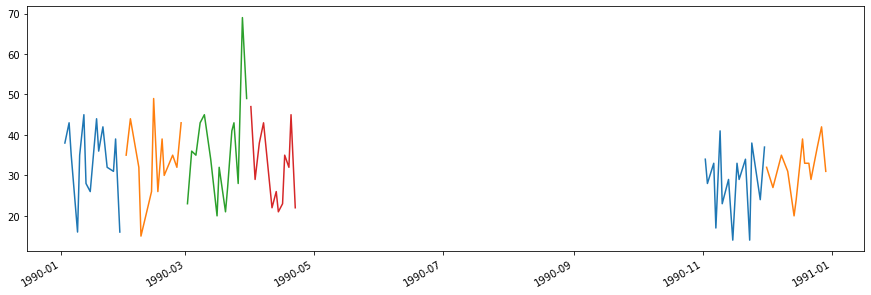

In [201]:
mj_1990.PTS.resample(rule='M').plot(figsize=(15,5))

In [220]:
mj_1990.resample(rule='M',convention='end').mean()

,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
Date,,,,,,,,,,,,,,,,,,
1990-01-31,24.933333,0.504333,1.466667,4.066667,0.258533,7.066667,8.333333,0.849533,1.666667,5.333333,7.000000,6.466667,3.066667,0.600000,3.200000,2.800000,33.733333,27.273333
1990-02-28,25.000000,0.509583,0.500000,1.666667,0.227273,8.000000,9.500000,0.833250,1.250000,3.833333,5.083333,5.916667,1.666667,0.500000,3.750000,2.833333,33.833333,24.100000
1990-03-31,24.533333,0.549600,1.266667,3.400000,0.384400,8.066667,9.266667,0.836429,2.200000,5.866667,8.066667,5.933333,3.800000,0.733333,2.133333,2.933333,36.400000,32.620000
1990-04-30,22.916667,0.551583,1.250000,3.500000,0.340250,5.166667,6.333333,0.724500,1.666667,4.666667,6.333333,6.500000,3.083333,1.000000,2.916667,3.583333,31.916667,27.058333
1990-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Below are use cases for non-DateTimeIndex dataframes*

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

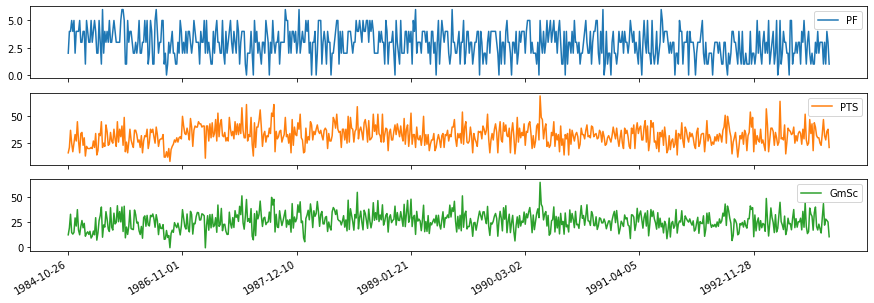

In [241]:
# Change index to strings so plotting becomes categorical
# When using DateTimeIndex, the date logic imputes dates that have no data
# which creates large gaps in the graph
mj_str_index = mj.set_index(pd.Series(mj.index.format()))
mj_str_index[cols[25:]].plot(figsize=(15,5),subplots=True)

In [251]:
# Index df with MultiIndex made up of year, month, date of records
date_index_arrays = [mj_1990.index.year, mj_1990.index.month, mj_1990.index.day]
mi = pd.MultiIndex.from_arrays(date_index_arrays, names=['Year',"Month","Day"])
mj_1990_mi = mj_1990.set_index(mi)
mj_1990_mi.index[:5]

MultiIndex([(1990, 1,  3),
            (1990, 1,  5),
            (1990, 1,  6),
            (1990, 1,  9),
            (1990, 1, 10)],
           names=['Year', 'Month', 'Day'])

In [256]:
mj_1990_mi[:40:5]

G     Age   Tm     Opp          GS     MP  FG  FGA  ...  ORB  \
Year Month Day                                                       ...        
1990 1     3    29  26-320  CHI  @  CLE   W (+6)  1  46:00  15   32  ...    1   
           12   34  26-329  CHI  @  CHH  W (+12)  1  40:00  19   28  ...    2   
           21   39  26-338  CHI     NYK   W (+8)  1  41:00  10   17  ...    1   
     2     1    44  26-349  CHI  @  HOU  L (-27)  1  38:00  16   31  ...    2   
           14   49  26-362  CHI  @  ORL   L (-6)  1  47:00  21   43  ...    1   
           25   54  27-008  CHI  @  NJN   W (+1)  1  44:00  12   24  ...    1   
     3     8    59  27-019  CHI     UTA   L (-4)  1  47:00  12   29  ...    5   
           20   64  27-031  CHI     WSB  W (+25)  1  39:00   8   19  ...    3   

                DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  
Year Month Day                                               
1990 1     3      7    8    8    4    0    1   4   38  31.0  
           12     2    4    6    1    0    2   4   45  35.8  
           21     9   10    7    4    2    4   4   42  41.4  
     2     1      4    6    5    2    0    3   0   35  24.4  
           14     6    7    2    0    1    0   1   49  30.3  
           25     7    8    8    2    2    5   4   32  24.8  
     3     8      2    7    4    7    0    3   5   43  35.2  
           20     5    8    5    2    2    3   2   21  17.6  

[8 rows x 27 columns]

In [267]:
mj_1990_mi.loc[1990,3][2:5]

,G,Age,Tm,,Opp,,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
Day,,,,,,,,,,,,,,,,,,,,,
6,58,27-017,CHI,@,MIL,W (+9),1,37:00,14,26,...,2,6,8,6,4,0,2,5,35,29.4
8,59,27-019,CHI,,UTA,L (-4),1,47:00,12,29,...,5,2,7,4,7,0,3,5,43,35.2
10,60,27-021,CHI,,IND,W (+12),1,39:00,17,27,...,2,5,7,3,5,1,2,5,45,39.6
